In [1]:
""" This notebook was created with testing the ML algorithms with varies of data"""

' This notebook was created with testing the ML algorithms with varies of data'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from Function import *
# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

# Training data - cross validation

## Find Best suitable data

In [3]:
def cross_val_result(X_train, y_train, models, scaler_model = None, prints= 1):
    '''
    Func to cross validate many models
    '''
    acc = 0
    max_acc = 0
    best_model = None
    for model in models:
        pipe_line = Pipeline([
        ('scaler', scaler_model),  
        ('classifier', model)])
        result = cross_val(pipe_line, 5, X_train, y_train, prints)
        acc += result
        if result >= max_acc:
            max_acc = result
            best_model = model
        print('\n')
    return acc/ len(models), best_model, max_acc

models = [
    LogisticRegression(max_iter= 10000, random_state = 17),
    RandomForestClassifier(max_depth= 7, random_state = 17),
    DecisionTreeClassifier(max_depth= 10, random_state = 17),
    SVC(probability= True, random_state = 17),
    LinearDiscriminantAnalysis(),
]

#### No normalize

In [4]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

cross_val_result(X_train, y_train, models)

Pipeline(steps=[('scaler', None),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 0.5618960857391357 seconds
Cross-validation scores: [0.76129032 0.74025974 0.68181818 0.72727273 0.72727273]
Mean CV score: 0.7275827398408043


Pipeline(steps=[('scaler', None),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 0.4987976551055908 seconds
Cross-validation scores: [0.74193548 0.76623377 0.7012987  0.75974026 0.74675325]
Mean CV score: 0.7431922915793884


Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.022659778594970703 seconds
Cross-validation scores: [0.72903226 0.70779221 0.5974026  0.72727273 0.66883117]
Mean CV score: 0.6860661918726434


Pipeline(steps=[('scaler', None),
                ('classifier', SVC(pr

(0.7187767071638038,
 RandomForestClassifier(max_depth=7, random_state=17),
 0.7431922915793884)

In [5]:
data = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data = selectkbest(data.drop(columns='Target'), data['Target'], 0.7)
X_train,X_test,y_train,y_test = split_train_test(data, 'Target', 0.2)

cross_val_result(X_train, y_train, models)

Pipeline(steps=[('scaler', None),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 0.5820956230163574 seconds
Cross-validation scores: [0.77419355 0.74025974 0.67532468 0.74025974 0.73376623]
Mean CV score: 0.7327607875994973


Pipeline(steps=[('scaler', None),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 0.49339938163757324 seconds
Cross-validation scores: [0.72258065 0.79220779 0.69480519 0.77272727 0.74025974]
Mean CV score: 0.744516129032258


Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.020034313201904297 seconds
Cross-validation scores: [0.7483871  0.70779221 0.64935065 0.70779221 0.68181818]
Mean CV score: 0.6990280687054881


Pipeline(steps=[('scaler', None),
                ('classifier', SVC(pr

(0.7231872643485546,
 RandomForestClassifier(max_depth=7, random_state=17),
 0.744516129032258)

#### Normalize

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data1 = selectkbest(data1.drop(columns='Target'), data1['Target'], 0.8)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

cross_val_result(X_train, y_train, models,scaler_model=StandardScaler())
# cross_val_result(X_train, y_train, models,scaler_model= MinMaxScaler())

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 0.052101850509643555 seconds
Cross-validation scores: [0.76774194 0.77272727 0.67532468 0.77272727 0.69480519]
Mean CV score: 0.7366652702136574


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 0.5033071041107178 seconds
Cross-validation scores: [0.76129032 0.77922078 0.68181818 0.76623377 0.75324675]
Mean CV score: 0.7483619606200251


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.026084184646606445 seconds
Cross-validation scores: [0.72903226 0.69480519 0.64285714 0.68831169 0.65584416]
Mean CV score: 0.6821700879765396


Pipeline(steps=[('scaler', Standa

(0.7291512358609132,
 RandomForestClassifier(max_depth=7, random_state=17),
 0.7483619606200251)

#### Data using Weight of Evidence

In [8]:
data = pd.read_csv('data\credit_customers.csv')
data.columns = data.columns.str.strip()
data = data.rename(columns={"class": "Target"})
target_mapping = {'good':0, 'bad': 1}
data['Target'] = data['Target'].map(target_mapping)
X_train,X_test,y_train,y_test = split_train_test(data, 'Target', 0.2)
woe = WOE()
X_train,iv,woe_res = woe.fit(X_train, y_train)
X_test = woe.transform(X_test)

cross_val_result(X_train, y_train, models)

Pipeline(steps=[('scaler', None),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 0.028826236724853516 seconds
Cross-validation scores: [0.7375  0.725   0.8     0.7375  0.78125]
Mean CV score: 0.75625


Pipeline(steps=[('scaler', None),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 0.47401857376098633 seconds
Cross-validation scores: [0.7     0.71875 0.79375 0.73125 0.78125]
Mean CV score: 0.7449999999999999


Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.017027854919433594 seconds
Cross-validation scores: [0.64375 0.6875  0.61875 0.59375 0.725  ]
Mean CV score: 0.65375


Pipeline(steps=[('scaler', None),
                ('classifier', SVC(probability=True, random_state=17))]) - With 5 folds - Finsh in 0.

(0.7324999999999999,
 SVC(probability=True, random_state=17),
 0.7575000000000001)

## Find best model performance

In [9]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data1 = selectkbest(data1.drop(columns='Target'), data1['Target'], 0.8)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

models = [
    LogisticRegression(max_iter= 10000, random_state = 17),
    LogisticRegression(max_iter= 10000, random_state = 17, solver='saga', penalty = 'l1'),
    LogisticRegression(max_iter= 10000, random_state = 17, solver = 'saga', penalty = 'l2'),
    LogisticRegression(max_iter= 10000, random_state = 17, solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.3),

]
cross_val_result(X_train, y_train, models,scaler_model=StandardScaler(),prints= 0)

(0.7369878508588186,
 LogisticRegression(max_iter=10000, penalty='l1', random_state=17, solver='saga'),
 0.7392542940930038)

In [10]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data1 = selectkbest(data1.drop(columns='Target'), data1['Target'], 0.8)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

models = [
    DecisionTreeClassifier(max_depth= 10, random_state = 17),
    DecisionTreeClassifier(max_depth= 9, random_state = 17),
    DecisionTreeClassifier(max_depth= 8, random_state = 17),
    DecisionTreeClassifier(max_depth= 7, random_state = 17),
    DecisionTreeClassifier(max_depth= 11, random_state = 17)

]
cross_val_result(X_train, y_train, models,scaler_model=StandardScaler(),prints= 0)

(0.6813958944281525,
 DecisionTreeClassifier(max_depth=8, random_state=17),
 0.6912693757855048)

In [11]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data1 = selectkbest(data1.drop(columns='Target'), data1['Target'], 0.8)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

models = [
    RandomForestClassifier(max_depth= 5, random_state = 17),
    RandomForestClassifier(max_depth= 6, random_state = 17),
    RandomForestClassifier(max_depth= 7, random_state = 17),
    RandomForestClassifier(max_depth= 8, random_state = 17),
    RandomForestClassifier(max_depth= 9, random_state = 17),
    RandomForestClassifier(max_depth= 10, random_state = 17),
    RandomForestClassifier(max_depth= 11, random_state = 17)

]
cross_val_result(X_train, y_train, models,scaler_model=StandardScaler(),prints= 0)

(0.7489341073672869,
 RandomForestClassifier(max_depth=10, random_state=17),
 0.7639463762044407)

# Predict - Out-of-Sample

In [12]:
final_models = [
    LogisticRegression(max_iter=10000, penalty='l1', random_state=17, solver='saga'),
    RandomForestClassifier(max_depth=10, random_state=17),
    DecisionTreeClassifier(max_depth=8, random_state=17),
    SVC(probability= True, random_state = 17),
    LinearDiscriminantAnalysis(),
]

results = []
mes = []

In [13]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data1 = selectkbest(data1.drop(columns='Target'), data1['Target'], 0.8)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)


for model in final_models:
    pipe_line = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', model)
    ])
    pod = prediction_result(pipe_line, X_train,X_test,y_train,y_test)
    me = ModelEvaluation(pod)
    cm, acc, precision, recall, f1_score = me.compute_conf_mat()
    auc,gini = me.compute_auc_gini()
    result = [model,acc,precision,recall,f1_score,auc,gini]
    results.append(result)
    mes.append(me)

In [14]:
data = pd.read_csv('data\credit_customers.csv')
data.columns = data.columns.str.strip()
data = data.rename(columns={"class": "Target"})
target_mapping = {'good':0, 'bad': 1}
data['Target'] = data['Target'].map(target_mapping)
X_train,X_test,y_train,y_test = split_train_test(data, 'Target', 0.2)
woe = WOE()
X_train,iv,woe_res = woe.fit(X_train, y_train)
X_test = woe.transform(X_test)

pipe_line = Pipeline([
('scaler', StandardScaler()),  
('classifier', final_models[0])
])
pod = prediction_result(pipe_line, X_train,X_test,y_train,y_test)
me = ModelEvaluation(pod)
cm, acc, precision, recall, f1_score = me.compute_conf_mat()
auc,gini = me.compute_auc_gini()
result = [final_models[0],acc,precision,recall,f1_score,auc,gini]
results.append(result)
mes.append(me)

In [15]:
pd_results = pd.DataFrame(results,columns= ['Model','Accuracy','Precision','Recall','F1_Score','AUC','GINI'])
pd_results['Model'] = pd_results['Model'].astype(str)
pd_results['Model'] = pd_results['Model'].str.extract('^\(?(\w*)\(')
pd_results.iloc[0,0] = 'LogisticRegression-Original'
pd_results.iloc[5,0] = 'LogisticRegression-WOE'
pd_results

,Model,Accuracy,Precision,Recall,F1_Score,AUC,GINI
0,LogisticRegression-Original,0.751295,0.439024,0.418605,0.428571,0.695194,0.390388
1,RandomForestClassifier,0.766839,0.472222,0.395349,0.430380,0.760465,0.520930
2,DecisionTreeClassifier,0.756477,0.452381,0.441860,0.447059,0.698837,0.397674
3,SVC,0.777202,0.500000,0.325581,0.394366,0.759225,0.518450
4,LinearDiscriminantAnalysis,0.740933,0.418605,0.418605,0.418605,0.699380,0.398760
5,LogisticRegression-WOE,0.770000,0.658537,0.457627,0.540000,0.798774,0.597548


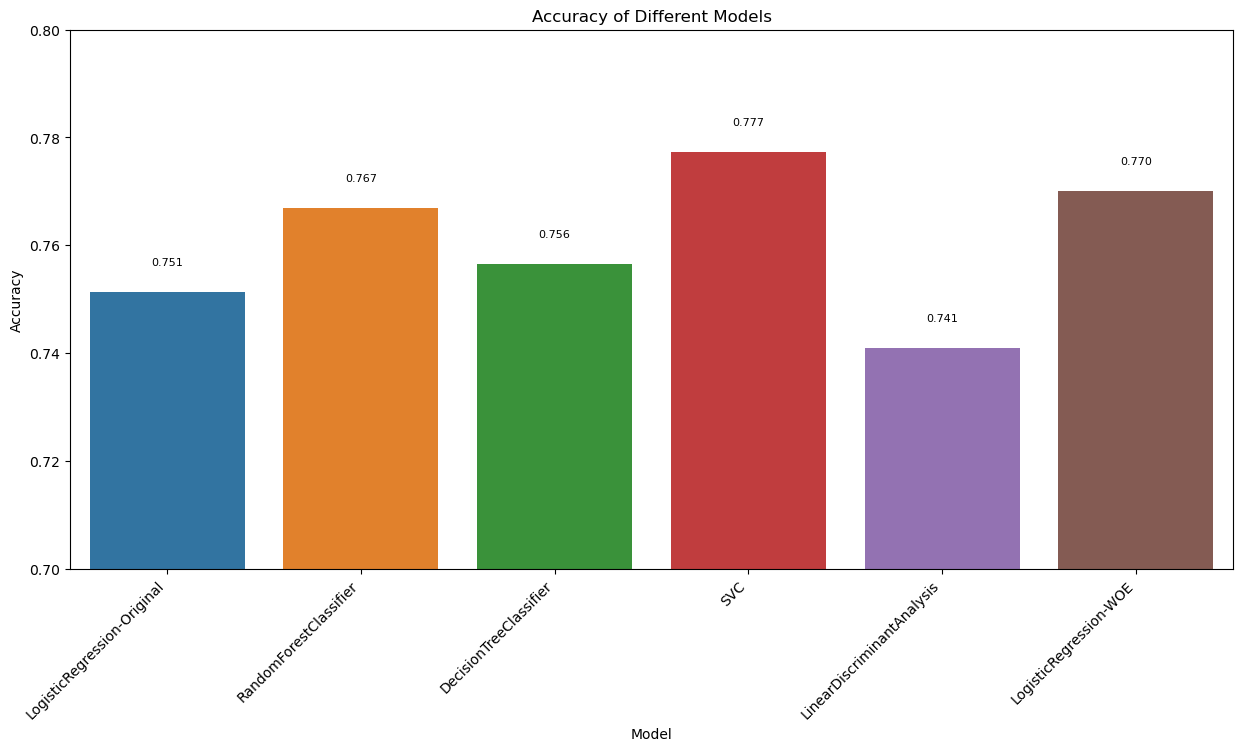

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x='Model', y='Accuracy', data=pd_results)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Set y-axis ticks starting from 0.7
plt.gca().set_ylim([0.7, 0.8])

# Add annotations for accuracy values
for index, row in pd_results.iterrows():
    plt.text(index, row['Accuracy'] + 0.005, f"{row['Accuracy']:.3f}", color='black',
             ha="center", fontsize=8)

plt.show()

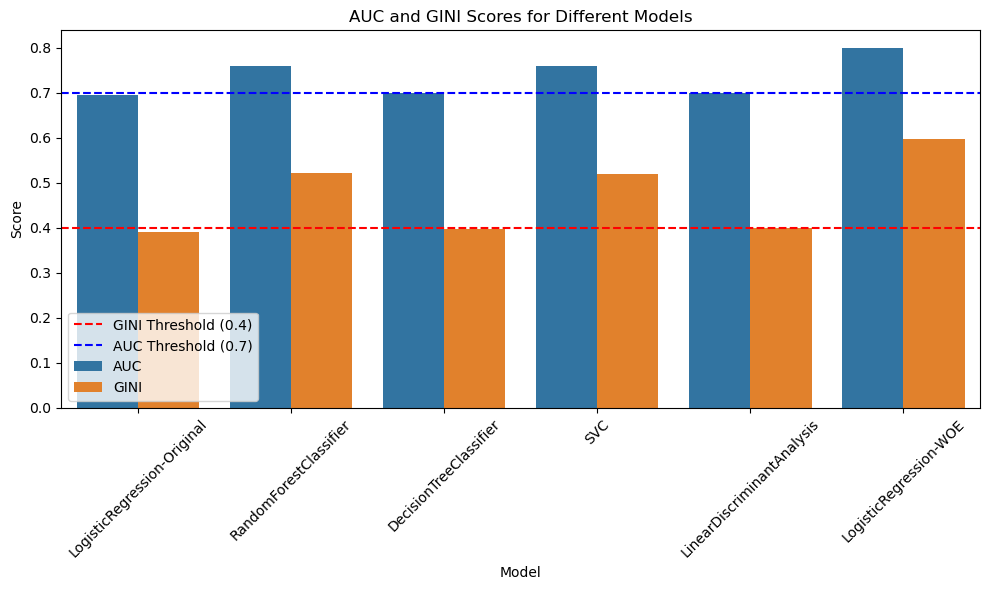

In [17]:
# Create a dataframe for AUC and GINI values
auc_gini_df = pd_results[['Model', 'AUC', 'GINI']]

# Melt the dataframe to reshape it for plotting
melted_df = auc_gini_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_df)
plt.title('AUC and GINI Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
# Draw horizontal lines for GINI and AUC
plt.axhline(y=0.4, color='r', linestyle='--', label='GINI Threshold (0.4)')
plt.axhline(y=0.7, color='b', linestyle='--', label='AUC Threshold (0.7)')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

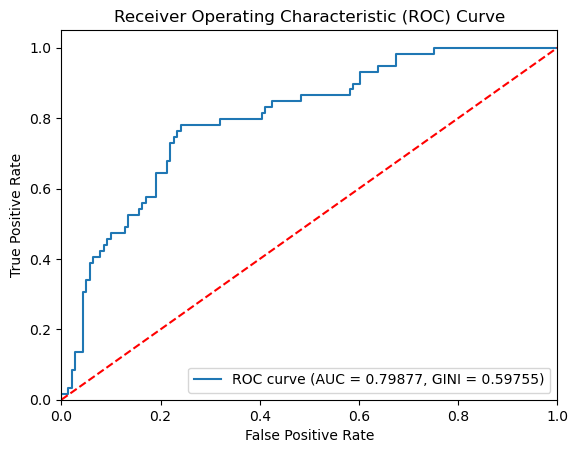

In [18]:
mes[5].plot_roc_curve()